In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment.csv to Unemployment (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("Unemployment.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
import pandas as pd

df = pd.read_csv("Unemployment.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.isnull().sum()


,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df.columns


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()
df.columns


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


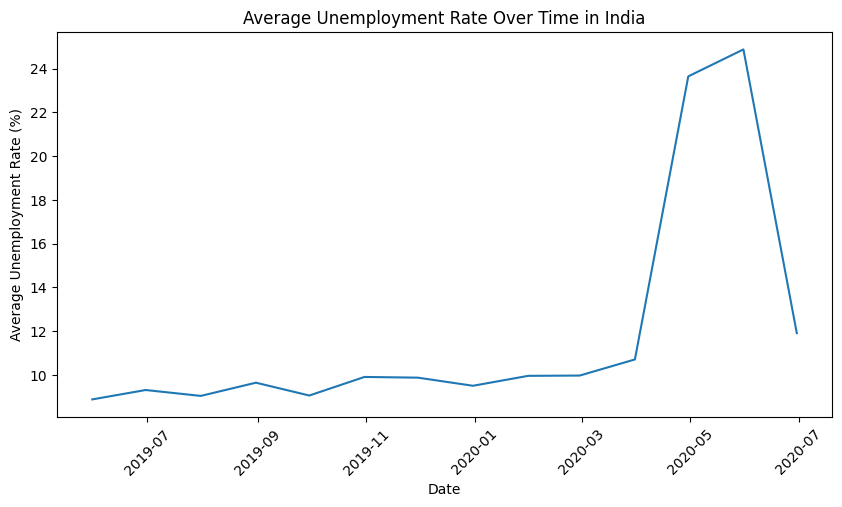

In [ ]:
avg_unemp = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_unemp.index, avg_unemp.values)
plt.xlabel("Date")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Average Unemployment Rate Over Time in India")
plt.xticks(rotation=45)
plt.show()




In [ ]:
top5_states = (
    df.groupby('Region')['Estimated Unemployment Rate (%)']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)



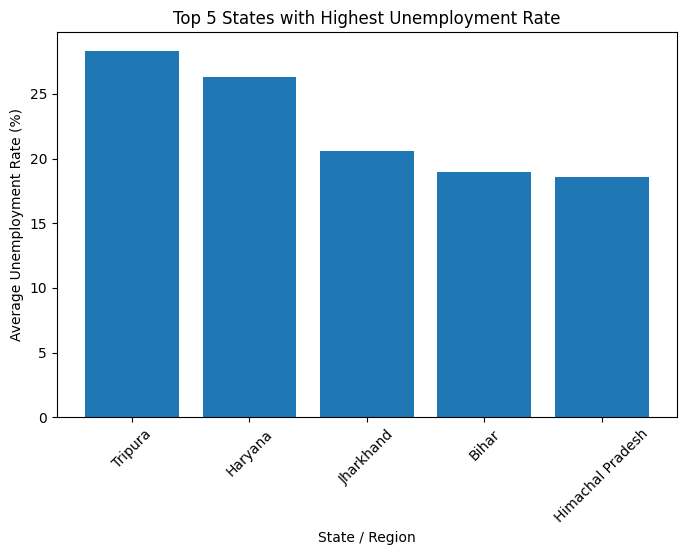

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_states.index, top5_states.values)
plt.xlabel("State / Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Top 5 States with Highest Unemployment Rate")
plt.xticks(rotation=45)
plt.show()


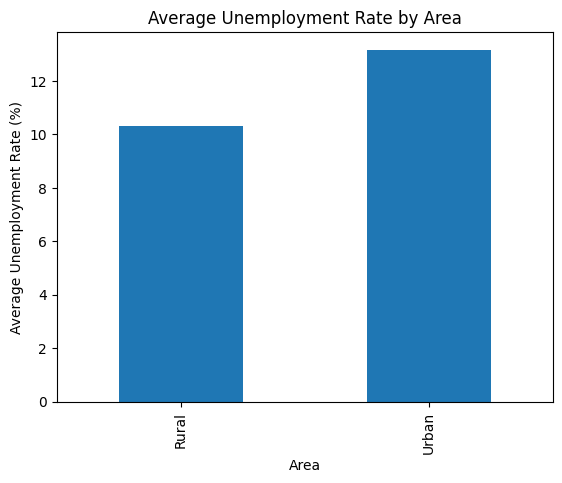

In [ ]:
area_avg = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

plt.figure()
area_avg.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Area')
plt.show()


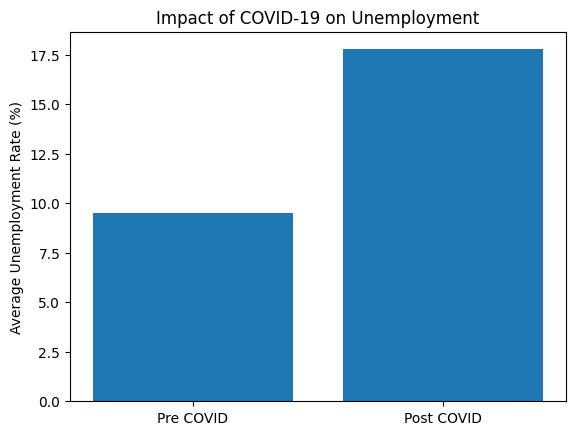

In [ ]:
pre_covid = df[df['Date'] < '2020-03-25']
post_covid = df[df['Date'] >= '2020-03-25']

pre_rate = pre_covid['Estimated Unemployment Rate (%)'].mean()
post_rate = post_covid['Estimated Unemployment Rate (%)'].mean()

plt.bar(['Pre COVID', 'Post COVID'], [pre_rate, post_rate])
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Impact of COVID-19 on Unemployment")
plt.show()



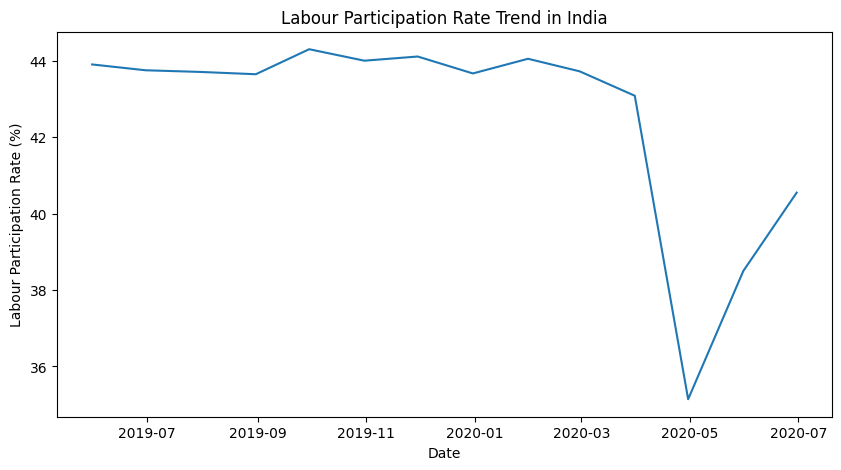

In [ ]:
labour_trend = df.groupby('Date')['Estimated Labour Participation Rate (%)'].mean()

plt.figure(figsize=(10,5))
plt.plot(labour_trend.index, labour_trend.values)
plt.xlabel("Date")
plt.ylabel("Labour Participation Rate (%)")
plt.title("Labour Participation Rate Trend in India")
plt.show()

